# Non-parametric Statistics 
## Chapter 2: Kernel Density Estimation
### Analysis of KDE

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from scipy import stats

In [2]:
# this code should work for anyone who cloned the project via github
# as it ensures that you have the correct project structure
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, "..", ".."))
plots_folder = os.path.join(project_root, "plots/chap2/analysis-kde")

# Please check this is correct path, hopefully it works fine
plots_folder

'/plots/chap2/motivation'

Example of pathological density and difficulty in using KDE

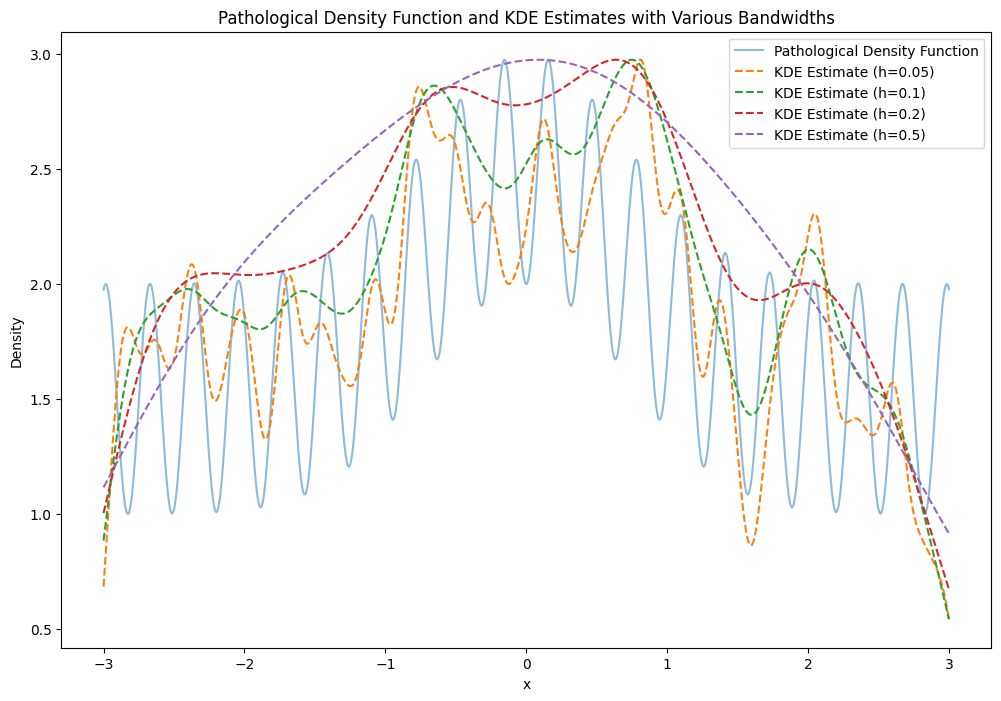

In [5]:
from scipy.stats import gaussian_kde
np.random.seed(41)

# A random pathological density function
# not strictly a density but fulfills our purpose
def pathological_density(x):
    return np.sin(10 * x)**2 + np.exp(-x**2) + 1

sample_x = np.linspace(-3, 3, 1000)
sample_y = pathological_density(sample_x)

sample_data = np.random.choice(sample_x, size=500, p= sample_y / np.sum(sample_y))

# Define the range for plotting and the original density values
x_values = np.linspace(-3, 3, 1000)
y_values = pathological_density(x_values)

bandwidths = [0.05, 0.1, 0.2, 0.5]
kde_estimations = [gaussian_kde(sample_data, bw_method=h) for h in bandwidths]

# Plotting
plt.figure(figsize=(12, 8))

# Plot the original function
plt.plot(x_values, y_values, label='Pathological Density Function', alpha=0.5)

# Plot KDE estimates with different bandwidths
for h, kde in zip(bandwidths, kde_estimations):
    kde_y_values = kde(x_values) * np.max(y_values) / np.max(kde(x_values))
    plt.plot(x_values, kde_y_values, linestyle='--', label=f'KDE Estimate (h={h})')

plt.title('Pathological Density Function and KDE Estimates with Various Bandwidths')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(plots_folder, 'pathological-density.png'))

plt.show()
